In [24]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data

from sklearn.cluster import *

# Clusterization using K-means

* Creation of 3 clusters
* Applying K-means to find their centroid

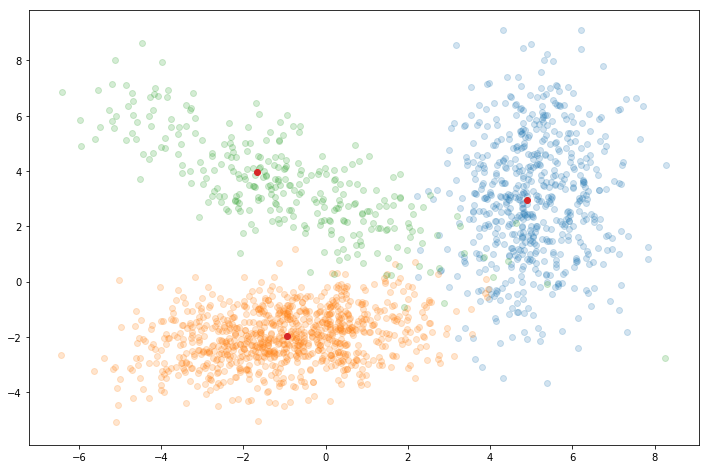

In [25]:
cluster_1 = np.random.multivariate_normal(
    mean=np.array([5.0, 3.0]),
    cov=np.array([[1.0, 0.2],
                  [0.2, 5.0]]),
    size=600)


cluster_2 = np.random.multivariate_normal(
    mean=np.array([-1., -2.]),
    cov=np.array([[3.0, 0.5],
                  [0.5, 1.0]]),
    size=900)


cluster_3 = np.random.multivariate_normal(
    mean=np.array([-1, 3.5]),
    cov=np.array([[5.0, -3.],
                  [-3., 3.0]]),
    size=300)


all_points = np.concatenate([cluster_1, cluster_2, cluster_3], axis=0)

k_means = KMeans(n_clusters=3)
k_means.fit(all_points)
centroids = k_means.cluster_centers_

plt.figure(figsize=(12, 8))
plt.scatter(cluster_1[:,0], cluster_1[:,1], alpha=0.2)
plt.scatter(cluster_2[:,0], cluster_2[:,1], alpha=0.2)
plt.scatter(cluster_3[:,0], cluster_3[:,1], alpha=0.2)
plt.scatter(centroids[:,0], centroids[:,1], marker='o')
plt.show()

# Problems of K-means
----

## Thin clusters

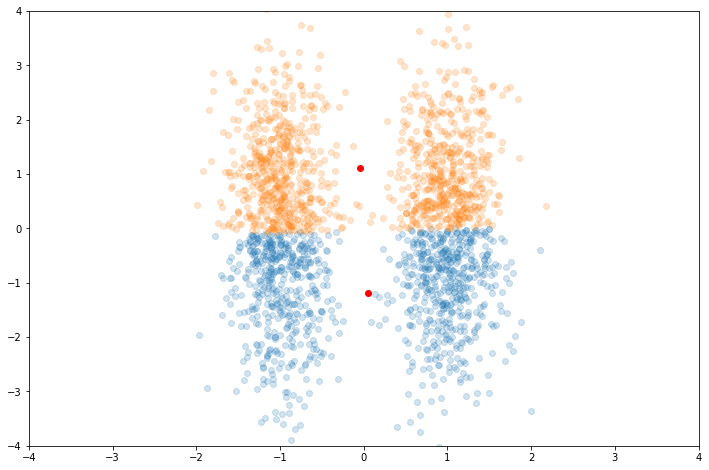

In [26]:
cluster_1 = np.random.multivariate_normal(
    mean=np.array([1.0, 0.0]),
    cov=np.array([[0.1, 0.0],
                  [0.0, 2.0]]),
    size=1000)


cluster_2 = np.random.multivariate_normal(
    mean=np.array([-1., 0.0]),
    cov=np.array([[0.1, 0.0],
                  [0.0, 2.0]]),
    size=1000)


all_points = np.concatenate([cluster_1, cluster_2], axis=0)

k_means = KMeans(n_clusters=2)
k_means.fit(all_points)
predictions = k_means.predict(all_points)

centroids = k_means.cluster_centers_
pred_1 = all_points[predictions == 0]
pred_2 = all_points[predictions == 1]

plt.figure(figsize=(12, 8))
plt.scatter(pred_1[:,0], pred_1[:,1], alpha=0.2)
plt.scatter(pred_2[:,0], pred_2[:,1], alpha=0.2)
plt.scatter(centroids[:,0], centroids[:,1], color='r')
plt.ylim(-4, 4)
plt.xlim(-4, 4)
plt.show()

## Solving thin clusters

Soft K-means
* Each point has a "degree of belonging" to the cluster
* Each cluster has its own variance (or standard deviation)
* Each axis of each cluster has its own variance (allows stretched clusters)
* Each cluster has an "importance" based on the number of points it contains

Each of these factors are learned.
This is in fact a maximum likelihood based algorithm.

In [ ]:
# TODO

# Non gaussian-shaped clusters
----

* Even if the cluster is generated using a gaussian law, it might be so in a different space
* In the projected space, we might have spirals, like shown below

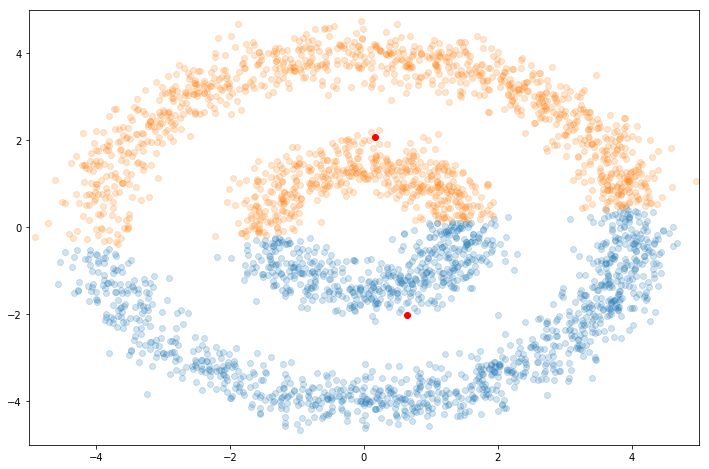

In [27]:
cluster_1 = np.random.multivariate_normal(
    mean=np.array([4.0, 0.0]),
    cov=np.array([[0.1, 0.0],
                  [0.0, 4.0]]),
    size=2000)


cluster_2 = np.random.multivariate_normal(
    mean=np.array([1.5, 0.0]),
    cov=np.array([[0.1, 0.0],
                  [0.0, 4.0]]),
    size=1000)


def transform(cluster):
    xs = cluster[:,0] * np.cos(cluster[:,1])
    ys = cluster[:,0] * np.sin(cluster[:,1])
    return np.concatenate([np.expand_dims(xs, -1), np.expand_dims(ys, -1)], axis=1)


cluster_1 = transform(cluster_1)
cluster_2 = transform(cluster_2)
all_points = np.concatenate([cluster_1, cluster_2], axis=0)

k_means = KMeans(n_clusters=2)
k_means.fit(all_points)
predictions = k_means.predict(all_points)

centroids = k_means.cluster_centers_
pred_1 = all_points[predictions == 0]
pred_2 = all_points[predictions == 1]

plt.figure(figsize=(12, 8))
plt.scatter(pred_1[:,0], pred_1[:,1], alpha=0.2)
plt.scatter(pred_2[:,0], pred_2[:,1], alpha=0.2)
plt.scatter(centroids[:,0], centroids[:,1], color='r')
plt.ylim(-5, 5)
plt.xlim(-5, 5)
plt.show()

## Solving non-gaussian shaped clusters (1)

Kernel K-means: use a kernel function to compute the distances in a different space

In [20]:
# TODO

## Solving non-gaussian shaped clusters (2)

Agglomerative Clustering: recursively merges the pair of clusters that minimally increases a given linkage distance. Several mode exist (some to minimize the distance of individual links 'single', some to minimize the variance of a cluster 'ward').

It works in the this case, but because of the correct selection of 'linkage'.

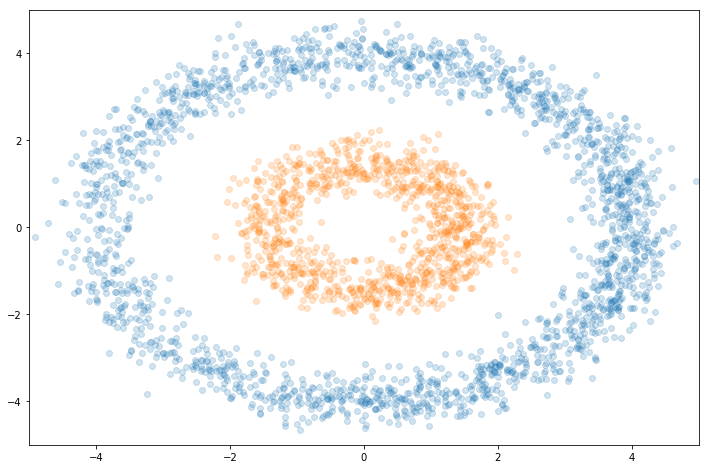

In [33]:
aglo = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
predictions = aglo.fit_predict(all_points)

pred_1 = all_points[predictions == 0]
pred_2 = all_points[predictions == 1]

plt.figure(figsize=(12, 8))
plt.scatter(pred_1[:,0], pred_1[:,1], alpha=0.2)
plt.scatter(pred_2[:,0], pred_2[:,1], alpha=0.2)
plt.ylim(-5, 5)
plt.xlim(-5, 5)
plt.show()

## Solving non-gaussian shaped clusters (3)

https://en.wikipedia.org/wiki/Spectral_clustering

Spectral clustering: the general approach is to use a standard clustering method (ex: k-means) on relevant eigenvectors of a Laplacian matrix of A, a symmetric matrix representing the similiarities between the points.

The similarities are computed based on RBF such as $e^{-\gamma(x - y)^2}$ (if $\gamma = \frac{1}{\sigma^2}$, we have a gaussian)

If affinity is the adjacency matrix of a graph, this method can be used to find normalized graph cuts.

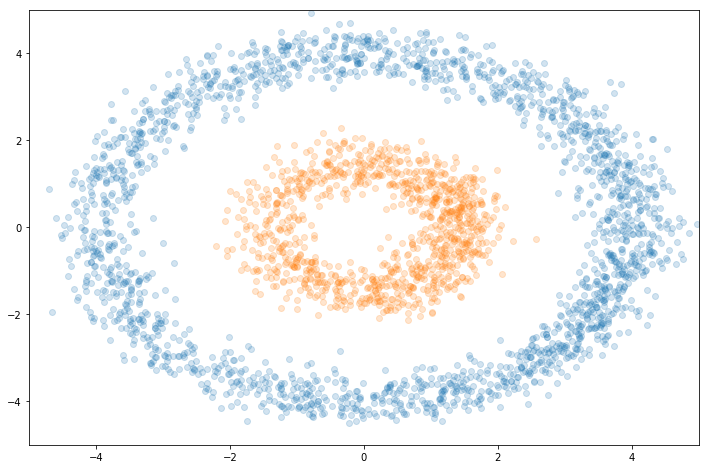

In [18]:
s_cluster = SpectralClustering(n_clusters=2, affinity='rbf', assign_labels='kmeans')
predictions = s_cluster.fit_predict(all_points)

pred_1 = all_points[predictions == 0]
pred_2 = all_points[predictions == 1]

plt.figure(figsize=(12, 8))
plt.scatter(pred_1[:,0], pred_1[:,1], alpha=0.2)
plt.scatter(pred_2[:,0], pred_2[:,1], alpha=0.2)
plt.ylim(-5, 5)
plt.xlim(-5, 5)
plt.show()

It works pretty great on thin clusters as well

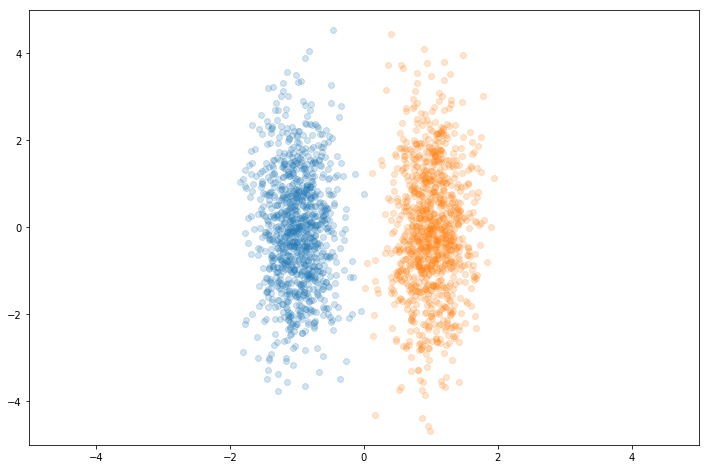

In [19]:
cluster_1 = np.random.multivariate_normal(
    mean=np.array([1.0, 0.0]),
    cov=np.array([[0.1, 0.0],
                  [0.0, 2.0]]),
    size=1000)


cluster_2 = np.random.multivariate_normal(
    mean=np.array([-1., 0.0]),
    cov=np.array([[0.1, 0.0],
                  [0.0, 2.0]]),
    size=1000)


all_points = np.concatenate([cluster_1, cluster_2], axis=0)

s_cluster = SpectralClustering(n_clusters=2, affinity='rbf', assign_labels='kmeans')
predictions = s_cluster.fit_predict(all_points)

pred_1 = all_points[predictions == 0]
pred_2 = all_points[predictions == 1]

plt.figure(figsize=(12, 8))
plt.scatter(pred_1[:,0], pred_1[:,1], alpha=0.2)
plt.scatter(pred_2[:,0], pred_2[:,1], alpha=0.2)
plt.ylim(-5, 5)
plt.xlim(-5, 5)
plt.show()